In [93]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [94]:
cities = pd.read_csv('data/Top50/top50cities.csv',delimiter=',')

In [95]:
#import nodes to get id from nodes/hosts
hosts = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    for p in range(1,14):
        if (os.path.exists('data/Top50/hosts/'+city['name']+str(p)+'.csv')):
            df = pd.read_csv('data/Top50/hosts/'+city['name']+str(p)+'.csv',index_col=False)
            hosts = pd.concat([hosts,df]).reset_index(drop=True)
print(len(hosts))
hosts=hosts.drop_duplicates()
print(len(hosts))


10586
10582


In [96]:
rev = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    if os.path.exists('data/Top50/reviews/'+city['name']+'Rev.csv'):
        df = pd.read_csv('data/Top50/reviews/'+city['name']+'Rev.csv',index_col=False)
        rev = pd.concat([rev,df]).reset_index(drop=True)
print(len(rev))
rev=rev.drop_duplicates()
print(len(rev))


96090
96085


In [97]:
!pip install geopy
from geopy import geocoders  


In [50]:
cities_not_found = []
def getCityCoords(name):
    # if geopy does not work -> http://www.geonames.org/login and log in with cred:
    # username: kacper
    # pass : zaq12345
    gn = geocoders.GeoNames(username='kacper')
    try:
        loc = gn.geocode(name, timeout=10)
        
        if loc is None:
            try: 
                loc =gn.geocode(name.split(',')[0],timeout=10)
                if loc is None:
                    raise TypeError
            except Exception as inst:
                print('This city was not found:',name)
                return None
    except Exception as inst:
        print('This city was not found:',name)
        cities_not_found.append(name)
        return None
    #print(len(loc))
   # print(loc[0].raw)
    return loc

In [71]:
#loc
#loc = getCityCoords(name)
#rev['lat']='NaN'
#rev['lng']='NaN'
#allCities=rev.fromPublicAddressDescription.unique()
#for city in allCities.tolist():
#    loc2=getCityCoords(city)
#    if loc2:
#        rev.loc[rev.fromPublicAddressDescription==city]['lat']=loc2.raw['lat']
#        rev.loc[rev.fromPublicAddressDescription==city]['lng']=loc2.raw['lng']






for idx,row in rev.iterrows():
    if row['lat']=='NaN':
        print(idx)
        #print(row['fromPublicAddressDescription'])
        loc2=getCityCoords(row['fromPublicAddressDescription'])
        if loc2:
            #print(loc.raw['lat'],loc.raw['lng'])
            rev['lat'][idx]=loc2.raw['lat']
            rev['lng'][idx]=loc2.raw['lng']

        #rev.loc[idx]['lng']

182
This city was not found: Bilhorod-Dnistrovs'kyi, Odessa Oblast, Ukraine
197
This city was not found: Bilhorod-Dnistrovs'kyi, Odessa Oblast, Ukraine
207
This city was not found: Yenakijeve, Donetsk Oblast, Ukraine
580
This city was not found: guayaqil, Ecuador
977
This city was not found: La boulladisse, Provance Alpes, France
1173
This city was not found: Pervomais'k, Mykolaivs'ka oblast, Ukraine
1351
This city was not found: khajurajo, Madhya Pradesh, India
1645
This city was not found: Volgogard, Volgograd Oblast, Russian Federation
2246
This city was not found: i was born in, Italy
2253
This city was not found: Plyos, Ivanovo Oblast. Привллжский район,, Russian Federation
2307


/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2466
This city was not found: ChIJq5EYs65unUcRC-cFw9pQGh4
2514
This city was not found: Guishan dist, Taoyuan, Taiwan, Province of China
2622
This city was not found: Khmel'nyts'kyi, Khmel'nyts'ka oblast, Ukraine
2833
This city was not found: Olmalik, Uzbekistan
2983
This city was not found: Guishan dist, Taoyuan, Taiwan, Province of China
3345
This city was not found: Clovis (Yosemite), CA, USA
3425
This city was not found: Rēzekne Municipality, Latvia
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
37

This city was not found: Krasnodar, Krasnodar Krai, Russian Federation
4514
This city was not found: Sochi, Krasnodar Krai, Russian Federation
4515
This city was not found: Firenze, Toscana, Italy
4516
This city was not found: Genoa, Liguria, Italy
4517
This city was not found: Patra, Greece
4518
This city was not found: Livorno, Toscana, Italy
4519
This city was not found: Palma de Mallorca, Balearic Islands, Spain
4520
This city was not found: Palma, Illes Balears, Spain
4521
This city was not found: Mohammed Mazhar, Cairo Governorate, Egypt
4522
This city was not found: Toulouse, Midi-Pyrenees, France
4523
This city was not found: Verona, Veneto, Italy
4524
This city was not found: Prague, Czech Republic
4525
This city was not found: Budapest, Hungary
4526
This city was not found: Yalta, Crimea, Ukraine
4527
This city was not found: Санкт-Петербург
4528
This city was not found: Sevastopol, Sevastopol' city
4529
This city was not found: Alupka, Crimea, Russian Federation
4530
This ci

This city was not found: Sabaneta, Antioquia, Colombia
4645
This city was not found: Kotka, Finland
4646
This city was not found: Lyon, Auvergne-Rhône-Alpes, France
4647
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
4648
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
4649
This city was not found: Copenhagen, Denmark
4650
This city was not found: São José dos Campos, São Paulo, Brazil
4651
This city was not found: Burgheim, Bavaria, Germany
4652
This city was not found: Tyumen, Tyumen Oblast, Russian Federation
4653
This city was not found: Madrid, Community of Madrid, Spain
4654
This city was not found: Roma, Lazio, Italy
4655
This city was not found: Moscow, Moscow, Russian Federation
4656
This city was not found: Kostroma, Kostroma, Russian Federation
4657
This city was not found: Hamburg, Hamburg, Germany
4658
This city was not found: Tver, Tver Oblast, Russian Federation
4659
This city was not found: Earth, World
46

This city was not found: Mariehamn, Mariehamns stad, Åland Islands
4778
This city was not found: Huddinge, Stockholms län, Sweden
4779
This city was not found: Vyborg, Leningrad, Russia
4780
This city was not found: Vyborg, Leningrad, Russian Federation
4781
This city was not found: Pskov, Pskov, Russia
4782
This city was not found: Moscow, Moscow City, Russian Federation
4783
This city was not found: Moscow, Moscow, Russian Federation
4784
This city was not found: Daegu, South Korea
4785
This city was not found: Milano, Lombardia, Italy
4786
This city was not found: Amman, Amman Governorate, Jordan
4787
This city was not found: Amman, Amman Governorate, Jordan
4788
This city was not found: Berlin, Berlin, Germany
4789
This city was not found: Milan, Lombardy, Italy
4790
This city was not found: La Bastide-de-Sérou, Occitanie, France
4791
This city was not found: Istanbul, Turkey
4792
This city was not found: Nancy, Lorraine, France
4793
This city was not found: Adrogué, Buenos Aires P

This city was not found: Seoul, Korea, Republic of
4910
This city was not found: Cambridge, MA, United States
4911
This city was not found: Santiago, Santiago, Chile
4912
This city was not found: Crema, Lombardia, Italy
4913
This city was not found: Simferopol', Krym
4914
This city was not found: Ivano-Frankivsk, Ivano-Frankivs'ka oblast, Ukraine
4915
This city was not found: Kiev, Ukraine
4916
This city was not found: Alicante, Valencian Community, Spain
4917
This city was not found: Singapore, Central Region, Singapore
4918
This city was not found: Shenzhen, Guangdong, China
4919
This city was not found: Berlin, Berlin, Germany
4920
This city was not found: İstanbul, Turkey
4921
This city was not found: Athens, Attica, Greece
4922
This city was not found: Providence, RI, USA
4923
This city was not found: Belgrade, Central Serbia, Serbia
4924
This city was not found: Bielefeld, Nordrhein-Westfalen, Germany
4925
This city was not found: Belo Horizonte, Minas Gerais, Brazil
4926
This ci

This city was not found: Moscow, Moscow, Russian Federation
5045
This city was not found: Sant Antoni de Portmany, Illes Balears, Spain
5046
This city was not found: Santa Eulalia del Río, Islas Baleares, Spain
5047
This city was not found: Balearic Islands, Spain
5048
This city was not found: Firenze, Italia, Italy
5049
This city was not found: Miami Beach, FL, USA
5050
This city was not found: Köln, Nordrhein-Westfalen, Germany
5051
This city was not found: Mellieha, Malta
5052
This city was not found: Ljubljana, Osrednjeslovenska, Slovenia
5053
This city was not found: Ljubljana, Ljubljana, Slovenia
5054
This city was not found: Bled, Radovljica, Slovenia
5055
This city was not found: Ljubljana, Osrednjeslovenska, Slovenia
5056
This city was not found: Gliwice, Silesian Voivodeship, Poland
5057
This city was not found: Suzdal, Vladimir Oblast, Russian Federation
5058
This city was not found: Mexico City, Mexico City, Mexico
5059
This city was not found: Interlaken, Bern, Switzerland

This city was not found: Ciudad de Corrientes, Corrientes, Argentina
5173
This city was not found: Bugibba, Malta, Malta
5174
This city was not found: Tortosa, Catalunya, Spain
5175
This city was not found: Las Palmas de GC, Canary Islands, Spain
5176
This city was not found: Valencia, Valencian Community, Spain
5177
This city was not found: Stockholm, Stockholm, Sweden
5178
This city was not found: Moscow, Moscow City, Russian Federation
5179
This city was not found: Helsinki, Uusimaa, Finland
5180
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
5181
This city was not found: Konigsberg, Kaliningradskaya oblast', Russian Federation
5182
This city was not found: Marrakesh, Marrakesh-Tensift-El Haouz, Morocco
5183
This city was not found: Taghazout, Souss-Massa, Morocco
5184
This city was not found: Agadir, Souss-Massa-Draa, Morocco
5185
This city was not found: Agadir, Souss-Massa-Draa, Morocco
5186
This city was not found: Zagora, Souss-Massa-Draa, Moroc

This city was not found: Velenje, Savinjska, Slovenia
5305
This city was not found: Prebold, Žalec, Slovenia
5306
This city was not found: Ljubljana, Slovenia
5307
This city was not found: Zory, Silesian Voivodeship, Poland
5308
This city was not found: Bialystok, Podlaskie, Poland
5309
This city was not found: Vienna, Vienna, Austria
5310
This city was not found: Dublin, Ireland
5311
This city was not found: Poznan, Greater Poland, Poland
5312
This city was not found: Wien, Wien, Austria
5313
This city was not found: Berlin, Berlin, Germany
5314
This city was not found: śląskie, Poland
5315
This city was not found: Warsaw, Mazovia, Poland
5316
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
5317
This city was not found: Porto, Porto District, Portugal
5318
This city was not found: Vinkovci, Vukovar-Syrmia, Croatia
5319
This city was not found: Koprivnica, Koprivnica-Krizevci, Croatia
5320
This city was not found: Varazdin, Varazdin, Croatia
5321
This ci

This city was not found: Nice, Provence-Alpes-Côte d'Azur, France
5440
This city was not found: Vienna, Vienna, Austria
5441
This city was not found: Moscow, Moscow, Russian Federation
5442
This city was not found: Ljubljana, Osrednjeslovenska, Slovenia
5443
This city was not found: Berlin, Berlin, Germany
5444
This city was not found: Berlin, Berlin, Germany
5445
This city was not found: Zelenogorsk, Krasnoyarsk Krai, Russian Federation
5446
This city was not found: Kozhikode, Kerala, India
5447
This city was not found: Pyryatyn, Poltavs'ka oblast, Ukraine
5448
This city was not found: Paphos, Paphos, Cyprus
5449
This city was not found: Muğla Akyaka, Muğla Province, Turkey
5450
This city was not found: Datca, Mugla, Turkey
5451
This city was not found: Edinburgh, uk
5452
This city was not found: Istanbul, Istanbul, Turkey
5453
This city was not found: Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia
5454
This city was not found: Makassar, South Sulawesi, Indonesia
5455
This 

This city was not found: Jakarta, Jakarta Special Capital Region (Java), Indonesia
5573
This city was not found: Sankt-Peterburg, Saint Petersburg, Russian Federation
5574
This city was not found: Kópavogur, Iceland
5575
This city was not found: Simferopol, Simferopol
5576
This city was not found: Yalta, Crimean Autonomous Republic, Ukraine
5577
This city was not found: Akureyri, Northeastern region, Iceland
5578
This city was not found: Izmir, İzmir, Turkey
5579
This city was not found: Sofia, Sofia City Province, Bulgaria
5580
This city was not found: Belgrade, City of Belgrade, Serbia
5581
This city was not found: Bucharest, Bucharest, Romania
5582
This city was not found: Kyiv, Kyiv city, Ukraine
5583
This city was not found: Chișinău, Chișinău, Moldova, Republic of
5584
This city was not found: Odesa, Odessa Oblast, Ukraine
5585
This city was not found: Wrocław, Województwo dolnośląskie, Poland
5586
This city was not found: Warsaw, Mazovia, Poland
5587
This city was not found: New

This city was not found: Qingyuan, Guangdong, China
5704
This city was not found: Freudenstadt, Baden-Wuerttemberg, Germany
5705
This city was not found: New Milford, CT, United States
5706
This city was not found: Chicago, IL, United States
5707
This city was not found: Lausanne, Vaud, Switzerland
5708
This city was not found: Saratov, Saratov, Russian Federation
5709
This city was not found: Akron, Ohio, United States
5710
This city was not found: Reims, Grand Est, France
5711
This city was not found: Melbourne, Victoria, Australia
5712
This city was not found: Edinburgh, Scotland, United Kingdom
5713
This city was not found: mendoza, Mendoza Province, Argentina
5714
This city was not found: Lima, Lima Metropolitan Area, Peru
5715
This city was not found: Munich, Bavaria, Germany
5716
This city was not found: Ankara, Ankara, Turkey
5717
This city was not found: Sparks, NV, USA
5718
This city was not found: Baltimore, Maryland, United States
5719
This city was not found: Köln, Nordrhe

This city was not found: Yekaterinburg, Sverdlovsk, Russia
5839
This city was not found: Rostov-on-Don, Rostov Oblast, Russian Federation
5840
This city was not found: Izhevsk, Udmurtskaja Respublika, Russian Federation
5841
This city was not found: Montrouge, Île-de-France, France
5842
This city was not found: Kostroma, Kostroma Oblast, Russian Federation
5843
This city was not found: Lviv, Lviv Oblast, Ukraine
5844
This city was not found: Samara, Samara, Russian Federation
5845
This city was not found: Seoul, Seoul, Korea (Republic of)
5846
This city was not found: Minsk, Minsk Region, Belarus
5847
This city was not found: Bystřice pod Hostýnem, Zlin Region, Czech Republic
5848
This city was not found: New Territories, Hong Kong
5849
This city was not found: Yekaterinburg, Sverdlovsk Oblast, Russian Federation
5850
This city was not found: Porto, Porto District, Portugal
5851
This city was not found: Sharjah, Sharjah, United Arab Emirates
5852
This city was not found: marcinelle, Wa

This city was not found: Zagreb, City of Zagreb, Croatia
5972
This city was not found: Hodošan, Međimurska županija, Croatia
5973
This city was not found: Bratislava, Bratislava Region, Slovakia
5974
This city was not found: Lappersdorf, Bayern, Germany
5975
This city was not found: Stockholm, Stockholms län, Sweden
5976
This city was not found: Odense, Denmark
5977
This city was not found: Copenhagen, Denmark
5978
This city was not found: Copenhagen, Capital Region of Denmark, Denmark
5979
This city was not found: Minsk, Belarus
5980
This city was not found: Hamburg, Hamburg, Germany
5981
This city was not found: Anderlecht, Brussels Capital Region, Belgium
5982
This city was not found: İstanbul, Turkey
5983
This city was not found: The Hague, Zuid-Holland, Netherlands
5984
This city was not found: Palermo, Sicilia, Italy
5985
This city was not found: Tallinn, Harju County, Estonia
5986
This city was not found: Volgograd, Volgograd Oblast, Russian Federation
5987
This city was not fou

This city was not found: Minsk, Minsk Region, Belarus
6106
This city was not found: Nizhny Novgorod, Nizhny Novgorod Oblast, Russian Federation
6107
This city was not found: Milano, Lombardia, Italy
6108
This city was not found: Linz, Upper Austria, Austria
6109
This city was not found: Minsk, Belarus
6110
This city was not found: Ostrava, Moravian-Silesian Region, Czech Republic
6111
This city was not found: Moscow, Moscow City, Russia
6112
This city was not found: Manchester, Manchester, England
6113
This city was not found: Nizhny Novgorod, Nizhny Novgorod, Russia
6114
This city was not found: Corfu, Greece
6115
This city was not found: South Kuta, Bali, Indonesia
6116
This city was not found: Klebang, Malacca, Malaysia
6117
This city was not found: Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia
6118
This city was not found: Kochi., Kerala., INDIA​.
6119
This city was not found: Panjim, Goa, India
6120
This city was not found: Moscow, Moscow, Russian Federation
6121
This 

This city was not found: Irkutsk Oblast, Russian Federation
6235
This city was not found: Alexandria, Alexandria Governorate, Egypt
6236
This city was not found: Royton, England, United Kingdom
6237
This city was not found: Cairo, Cairo, Egypt
6238
This city was not found: Beijing, Beijing, China
6239
This city was not found: London, England, United Kingdom
6240
This city was not found: Yelabuga, Tatarstan, Russian Federation
6241
This city was not found: Moscow, Moscow City, Russia
6242
This city was not found: Antwerp, Antwerp, Belgium
6243
This city was not found: Berlin, Berlin, Germany
6244
This city was not found: Minsk, Minsk Region, Belarus
6245
This city was not found: Hong Kong, Hong Kong
6246
This city was not found: Salzburg, Salzburg, Austria
6247
This city was not found: Letchworth Garden City, England, United Kingdom
6248
This city was not found: Berlin, Berlin, Germany
6249
This city was not found: Osnabrück, Lower Saxony, Germany
6250
This city was not found: Berlin, B

This city was not found: Gothenburg, Västra Götalands län, Sweden
6366
This city was not found: Poá, São Paulo, Brazil
6367
This city was not found: Gothenburg, Västra Götalands län, Sweden
6368
This city was not found: Ariquemes, Rondônia, Brazil
6369
This city was not found: Belo Horizonte, State of Minas Gerais, Brazil
6370
This city was not found: Bogotá, Bogota, Colombia
6371
This city was not found: Izhevsk, Udmurt Republic, Russian Federation
6372
This city was not found: Manila, National Capital Region, Philippines
6373
This city was not found: Milano, Lombardia, Italy
6374
This city was not found: Dresden, Saxony, Germany
6375
This city was not found: Antioquia, Colombia
6376
This city was not found: Mexico City, Distrito Federal, Mexico
6377
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
6378
This city was not found: Salta, Salta, Argentina
6379
This city was not found: Varna, Varna, Bulgaria
6380
This city was not found: Belgrade, City of Bel

This city was not found: Prague, Prague, Czech Republic
6496
This city was not found: Utrecht, Utrecht, Netherlands
6497
This city was not found: London, England, United Kingdom
6498
This city was not found: Glasgow, Glasgow, Scotland
6499
This city was not found: Phnom Penh, Phnom Penh, Cambodia
6500
This city was not found: Tel Aviv-Yafo, Tel Aviv District, Israel
6501
This city was not found: Glasgow, Scotland, United Kingdom of Great Britain and Northern Ireland
6502
This city was not found: Madrid, Madrid, Spain
6503
This city was not found: Singapore, Singapore
6504
This city was not found: Montreal, Quebec, Canada
6505
This city was not found: Brno, South Moravian Region, Czech Republic
6506
This city was not found: Pattaya, Chonburi, Thailand
6507
This city was not found: Gent, East-Flanders, Belgium
6508
This city was not found: Krasnodar, Krasnodar Krai, Russian Federation
6509
This city was not found: Łódź, województwo łódzkie, Poland
6510
This city was not found: Melbourne,

This city was not found: Hangzhou, Zhejiang, China
6625
This city was not found: New York, NY, USA
6626
This city was not found: Paphos, Paphos, Cyprus
6627
This city was not found: Sofia, Bulgaria
6628
This city was not found: Rohtak, Haryana, India
6629
This city was not found: Graz, Steiermark, Austria
6630
This city was not found: Paris, Ile-de-France, France
6631
This city was not found: Manila, National Capital Region, Philippines
6632
This city was not found: Asnières-sur-Seine, Île-de-France, France
6633
This city was not found: Munich, Bavaria, Germany
6634
This city was not found: Paris, Ile-de-France, France
6635
This city was not found: Khmel'nyts'kyi, Khmel'nyts'ka oblast, Ukraine
6636
This city was not found: Danshui, New Taipei, Taiwan
6637
This city was not found: Köln, Nordrhein-Westfalen, Germany
6638
This city was not found: Rotterdam, Zuid-Holland, Netherlands
6639
This city was not found: Amsterdam, Noord-Holland, Netherlands
6640
This city was not found: Berlin, B

This city was not found: Prague, Czech Republic
6760
This city was not found: Nootdorp, South Holland, Netherlands
6761
This city was not found: New Delhi, Delhi, India
6762
This city was not found: Vitsyebsk, Vitsyebsk Region, Belarus
6763
This city was not found: Brest, Brest Region, Belarus
6764
This city was not found: Krakow, Lesser Poland, Poland
6765
This city was not found: Freiburg im Breisgau, Baden-Württemberg, Germany
6766
This city was not found: Curitiba, Paraná, Brazil
6767
This city was not found: Madrid, Madrid, Spain
6768
This city was not found: Miami, FL, USA
6769
This city was not found: Chicago, IL, USA
6770
This city was not found: Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina
6771
This city was not found: Istanbul, Istanbul, Turkey
6772
This city was not found: Istanbul, Istanbul, Turkey
6773
This city was not found: Cairo, Cairo Governorate, Egypt
6774
This city was not found: Tehran, Tehran Province, Iran (Islamic Republic of)
6775
This city was not

This city was not found: Rennes, Brittany, France
6893
This city was not found: Paris, Île-de-France, France
6894
This city was not found: Ciudad de México, Ciudad de México, Mexico
6895
This city was not found: Paris, Île-de-France, France
6896
This city was not found: Anyang-si, Gyeonggi-do, South Korea
6897
This city was not found: Paris, Île-de-France, France
6898
This city was not found: San Sebastián, País Vasco, Spain
6899
This city was not found: Nizhny Novgorod, Nizhny Novgorod Oblast, Russian Federation
6900
This city was not found: Rio de Janeiro, Rio de Janeiro, Brazil
6901
This city was not found: London, London, Eng
6902
This city was not found: Bishkek, Chuy Province, Kyrgyzstan
6903
This city was not found: Mo i Rana, Nordland, Norway
6904
This city was not found: Cheongju-si, Chungcheongbuk-do, Korea, Republic of
6905
This city was not found: Buenos Aires, Autonomous City of Buenos Aires, Argentina
6906
This city was not found: Trento, Trentino-Alto Adige/South Tyrol, 

This city was not found: Tin Hau/Causeway Bay, Hong Kong
7024
This city was not found: Severobaykalsk, Buryatia, Russian Federation
7025
This city was not found: Zhigalovo, Irkutsk Oblast, Russian Federation
7026
This city was not found: Khabarovsk, Khabarovsk Krai, Russian Federation
7027
This city was not found: Ussuriysk, Primorskiy kray, Russian Federation
7028
This city was not found: Nakhodka, Primorsky Region, Russian Federation
7029
This city was not found: Khabarovsk, Khabarovsk Region, Russia
7030
This city was not found: Vladivostok, Primorsky Krai, Russian Federation
7031
This city was not found: Blagoveshchensk, Amurskaya oblast', Russian Federation
7032
This city was not found: Blagoveshchensk, Amur, Russian Federation
7033
This city was not found: Volgograd, Volgogradskaya oblast', Russian Federation
7034
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
7035
This city was not found: Kirov Oblast, Russian Federation
7036
This city was not fo

This city was not found: Jena, Thüringen, Germany
7153
This city was not found: Suldal, Rogaland, Norway
7154
This city was not found: Amsterdam, Noord-Holland, Netherlands
7155
This city was not found: Subotica, Vojvodina, Serbia
7156
This city was not found: Oslo, Oslo, Norway
7157
This city was not found: Novi Sad, Vojvodina, Serbia
7158
This city was not found: Bogotá, Bogotá, Colombia
7159
This city was not found: Warsaw, Masovian Voivodeship, Poland
7160
This city was not found: Berlin, Berlin, Germany
7161
This city was not found: Казань, Татарстан, Russian Federation
7162
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
7163
This city was not found: Perth, Western Australia, Australia
7164
This city was not found: Pittsburgh, PA, USA
7165
This city was not found: Vrindavan, Uttar Pradesh, India
7166
This city was not found: New Delhi, Delhi, India
7167
This city was not found: Kolkata, West Bengal, India
7168
This city was not found: Irkutsk Oblas

This city was not found: München, Bayern, Germany
7288
This city was not found: Vienna, Vienna, Austria
7289
This city was not found: Petrozavodsk, Kareliya Republits, Russian Federation
7290
This city was not found: Petrozavodsk, Republic of Karelia, Russian Federation
7291
This city was not found: Ankara, Ankara, Turkey
7292
This city was not found: Diyarbakir, Diyarbakir, Turkey
7293
This city was not found: Montevideo, Montevideo, Uruguay
7294
This city was not found: Mugla, Mugla, Turkey
7295
This city was not found: Şırnak, Şırnak, Turkey
7296
This city was not found: Saint Petersburg, Saint Petersburg, Russia
7297
This city was not found: Elista, Kalmyk Republic, Russia
7298
This city was not found: Volgograd, Volgograd, Russia
7299
This city was not found: Chelles, Ile-de-France, France
7300
This city was not found: Moscow, Moscow, Russian Federation
7301
This city was not found: Ternopil, Ternopil's'ka oblast, Ukraine
7302
This city was not found: Moscow, Moscow City, Russian 

This city was not found: Sanya, Hainan, China
7421
This city was not found: Amsterdam, Noord-Holland, Netherlands
7422
This city was not found: Stockholm, Stockholm County, Sweden
7423
This city was not found: Málaga, Estepona, Spain
7424
This city was not found: Chennai, Tamil Nadu, India
7425
This city was not found: Moskva, Moscow, Russian Federation
7426
This city was not found: Sankt-Peterburg, Saint Petersburg, Russian Federation
7427
This city was not found: Witten, North Rhine-Westphalia, Germany
7428
This city was not found: Chicago, IL, USA
7429
This city was not found: Saratov, Saratov, Russian Federation
7430
This city was not found: Bogotá, Bogotá, Colombia
7431
This city was not found: Adelaide, South Australia, Australia
7432
This city was not found: Bryansk, Bryansk Oblast, Russian Federation
7433
This city was not found: Germering, Bavaria, Germany
7434
This city was not found: Minsk, Minsk Region, Belarus
7435
This city was not found: Bangkok, Bangkok, Thailand
7436
T

This city was not found: Yekaterinburg, Sverdlovsk, Russian Federation
7553
This city was not found: Arnhem, Gelderland, Netherlands
7554
This city was not found: Brownsboro, AL, USA
7555
This city was not found: Zurich, Zurich, Switzerland
7556
This city was not found: Vladivostok, Primorskiy kray, Russian Federation
7557
This city was not found: Dublin, Dublin, Ireland (Republic of)
7558
This city was not found: Moskva, Moscow, Russian Federation
7559
This city was not found: Montbazens, Midi-Pyrenees, France
7560
This city was not found: Paris, Ile-de-France, France
7561
This city was not found: Paris, Ile-de-France, France
7562
This city was not found: Pertuis, Provence-Alpes-Cote d'Azur, France
7563
This city was not found: Aix-en-Provence, Provence-Alpes-Cote d'Azur, France
7564
This city was not found: Miami, FL, USA
7565
This city was not found: Lafayette, Colorado, United States
7566
This city was not found: Brussels, Brussels, Belgium
7567
This city was not found: Paris, Ile-

This city was not found: Cairo, Cairo Governorate, Egypt
7696
This city was not found: Belo Horizonte, Minas Gerais, Brazil
7697
This city was not found: Barcelona, Catalonia, Spain
7698
This city was not found: Lodeynoye Pole, Leningrad, Russia
7699
This city was not found: Kiruna N, Norrbottens län, Sweden
7700
This city was not found: Seattle, Washington, United States
7701
This city was not found: Moscow, Moscow City, Russia
7702
This city was not found: London, London, England
7703
This city was not found: Uppingham, Rutland, England
7704
This city was not found: Munich, Bavaria, Germany
7705
This city was not found: Bamberg, Bayern, Germany
7706
This city was not found: Diemen, Noord-Holland, Netherlands
7707
This city was not found: Choisy-le-Roi, Ile-de-France, France
7708
This city was not found: Nice, Provence-Alpes-Cote d'Azur, France
7709
This city was not found: Nice, Provence-Alpes-Cote d'Azur, France
7710
This city was not found: London, England, United Kingdom
7711
This

This city was not found: Billings, MT, United States
7830
This city was not found: Sebastopol, CA, USA
7831
This city was not found: Lubbock, TX, United States
7832
This city was not found: Las Cruces, NM, USA
7833
This city was not found: Sun City, AZ, United States
7834
This city was not found: Seattle, Washington, United States
7835
This city was not found: Oakland, CA, USA
7836
This city was not found: Portland, OR, United States
7837
This city was not found: Detroit, MI, United States
7838
This city was not found: Toulouse, Midi-Pyrenees, France
7839
This city was not found: Dresden, Saxony, Germany
7840
This city was not found: Abromiškės, Vilniaus apskritis, Lithuania
7841
This city was not found: Łódź, województwo łódzkie, Poland
7842
This city was not found: Lübeck, Schleswig-Holstein, Germany
7843
This city was not found: Hamburg, Hamburg, Germany
7844
This city was not found: Bremen, Bremen, Germany
7845
This city was not found: Bissendorf, Niedersachsen, Germany
7846
This c

This city was not found: Novosibirsk, Novosibirsk, Russian Federation
7968
This city was not found: Rotterdam, Zuid-Holland, Netherlands
7969
This city was not found: Geneva, Geneva, Switzerland
7970
This city was not found: London, London, England
7971
This city was not found: Gent, East-Flanders, Belgium
7972
This city was not found: Hong Kong Island, Hong Kong Special Administrative Region, China
7973
This city was not found: chicago, IL, USA
7974
This city was not found: Antwerpen, Vlaanderen, Belgium
7975
This city was not found: Gent, East-Flanders, Belgium
7976
This city was not found: Brussels, Brussels, Belgium
7977
This city was not found: Saint-Gilles, Brussels, Belgium
7978
This city was not found: Castelldefels, Catalonia, Spain
7979
This city was not found: The Hague, Zuid-Holland, Netherlands
7980
This city was not found: Den Haag, Zuid-Holland, Netherlands
7981
This city was not found: South Lake Tahoe, California, United States
7982
This city was not found: Sankt-Peter

This city was not found: Volgograd, Volgograd, Russia
8107
This city was not found: Moscow, Moscow City, Russian Federation
8108
This city was not found: Ordos, Inner Mongolia, China
8109
This city was not found: Voronezh, Voronezh Oblast, Russian Federation
8110
This city was not found: Beijing, Beijing Municipality, China
8111
This city was not found: Bratislava, Bratislava, Slovakia
8112
This city was not found: Potsdam, Brandenburg, Germany
8113
This city was not found: Irkutsk, Irkutskaya oblast', Russian Federation
8114
This city was not found: Saint Petersburg, Saint Petersburg, Russia
8115
This city was not found: Graz, Steiermark, Austria
8116
This city was not found: São José dos Campos, State of São Paulo, Brazil
8117
This city was not found: Paris, Île-de-France, France
8118
This city was not found: Basel, Basel-Town, Switzerland
8119
This city was not found: Guilers, France
8120
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
8121
This city 

This city was not found: Berlin, Berlin, Germany
8236
This city was not found: Malmö, Skåne län, Sweden
8237
This city was not found: Los Angeles, CA, United States
8238
This city was not found: Amsterdam, Noord-Holland, Netherlands
8239
This city was not found: Cologne, North Rhine-Westphalia, Germany
8240
This city was not found: Szczawa, Lesser Poland, Poland
8241
This city was not found: Tainan City, Taiwan, Province of China
8242
This city was not found: Rasht, Gilan Province, Iran (Islamic Republic of)
8243
This city was not found: Vitoria-Gasteiz, Euskadi, Spain
8244
This city was not found: Tbilisi, Tbilisi, Georgia
8245
This city was not found: Khabarovsk, Khabarovsk Krai, Russian Federation
8246
This city was not found: Ashdod, Southern district, Israel
8247
This city was not found: Poznan, Greater Poland, Poland
8248
This city was not found: Lisbon, Lisbon, Portugal
8249
This city was not found: Porto Alegre, State of Rio Grande do Sul, Brazil
8250
This city was not found: T

This city was not found: Tehran, Tehran Province, Iran (Islamic Republic of)
8369
This city was not found: fukushima, Osaka Prefecture, Japan
8370
This city was not found: Kobe, Hyogo perfecture, Japan
8371
This city was not found: Nara Prefecture, Japan
8372
This city was not found: Showa Ward, Aichi Prefecture, Japan
8373
This city was not found: Shinjuku, Tokyo, Japan
8374
This city was not found: Amsterdam, Noord-Holland, Netherlands
8375
This city was not found: Köln, Nordrhein-Westfalen, Germany
8376
This city was not found: Baku, Baku, Azerbaijan
8377
This city was not found: Köln, Nordrhein-Westfalen, Germany
8378
This city was not found: Venice, Veneto, Italy
8379
This city was not found: Bratislava, Bratislava Region, Slovakia
8380
This city was not found: Vienna, Vienna, Austria
8381
This city was not found: Wien, Wien, Austria
8382
This city was not found: Bucharest, Bucharest, Romania
8383
This city was not found: Hamedan, Hamedan, Iran, Islamic Republic Of
8384
This city 

This city was not found: London, England, United Kingdom of Great Britain and Northern Ireland
8507
This city was not found: Hollybush, Wales, United Kingdom of Great Britain and Northern Ireland
8508
This city was not found: Puebla, Puebla, Mexico
8509
This city was not found: Berlin, Berlin, Germany
8510
This city was not found: Praha, Czechia
8511
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
8512
This city was not found: Olomouc, Olomouc Region, Czech Republic
8513
This city was not found: Viciebsk, Vitebsk Region, Belarus
8514
This city was not found: Valence, Auvergne-Rhône-Alpes, France
8515
This city was not found: Brasilia, Distrito Federal, Brazil
8516
This city was not found: Madison, WI, USA
8517
This city was not found: Richmond, VA, USA
8518
This city was not found: Kfar Malal, Central district, Israel
8519
This city was not found: London, England, United Kingdom of Great Britain and Northern Ireland
8520
This city was not found: Cottbus,

This city was not found: Glasgow, Glasgow, Scotland
8644
This city was not found: Glasgow, Scotland, United Kingdom of Great Britain and Northern Ireland
8645
This city was not found: Sydney, New South Wales, Australia
8646
This city was not found: york, yorkshire, England
8647
This city was not found: Buenos Aires, Buenos Aires, Argentina
8648
This city was not found: Piotrków Trybunalski, Łódź Voivodeship, Poland
8649
This city was not found: york, yorkshire, England
8650
This city was not found: Vienna, Vienna, Austria
8651
This city was not found: Administrative unit Maribor, Slovenia
8652
This city was not found: Pune, Maharashtra, India
8653
This city was not found: Narara, New South Wales, Australia
8654
This city was not found: Lille, France
8655
This city was not found: İstanbul, Turkey
8656
This city was not found: Austria
8657
This city was not found: Spain
8658
This city was not found: Attica, OH, USA
8659
This city was not found: Seoul, Korea (Republic of)
8660
This city w

This city was not found: Laufen, Bavaria, Germany
8776
This city was not found: Wrocław, Lower Silesian Voivodeship, Poland
8777
This city was not found: Bratislava, Bratislavský kraj, Slovakia
8778
This city was not found: Vienna, Vienna, Austria
8779
This city was not found: Brno, South Moravian Region, Czechia
8780
This city was not found: Santiago, Santiago Metropolitan Region, Chile
8781
This city was not found: Rennes, Brittany, France
8782
This city was not found: Madrid, Community of Madrid, Spain
8783
This city was not found: Brussels, Brussels, Belgium
8784
This city was not found: Bratislava, Bratislavský kraj, Slovakia
8785
This city was not found: Manchester, England, United Kingdom of Great Britain and Northern Ireland
8786
This city was not found: Oslo, Oslo, Norway
8787
This city was not found: Eindhoven, Noord Brabant, Netherlands
8788
This city was not found: Linz, Upper Austria, Austria
8789
This city was not found: Boulder, CO, USA
8790
This city was not found: Berl

This city was not found: Bad Nauheim, Hessen, Germany
8912
This city was not found: Budapest, Hungary
8913
This city was not found: Mitilini, Egeo, Greece
8914
This city was not found: Montreal, Québec, Canada
8915
This city was not found: Łódź Voivodeship, Poland
8916
This city was not found: Tuttlingen, Baden-Wuerttemberg, Germany
8917
This city was not found: Providencia, Región Metropolitana, Chile
8918
This city was not found: Mexico City, Federal District, Mexico
8919
This city was not found: Moscow, Moscow, Russian Federation
8920
This city was not found: Cernusco sul Naviglio, Lombardy, Italy
8921
This city was not found: Steamboat Springs, CO, USA
8922
This city was not found: Kyoto, Kyoto, Japan
8923
This city was not found: alicante, comunidad valenciana, Spain
8924
This city was not found: New York, NY, USA
8925
This city was not found: Moscow, Moscow, Russian Federation
8926
This city was not found: Burgos, Castile and Leon, Spain
8927
This city was not found: Houston, TX,

This city was not found: Zürich, Zurich, Switzerland
9045
This city was not found: Boulder, CO, United States
9046
This city was not found: Istanbul, Istanbul, Turkey
9047
This city was not found: Cairo, Cairo Governorate, Egypt
9048
This city was not found: Aswan, Aswan Governorate, Egypt
9049
This city was not found: Mulhouse, Grand Est, France
9050
This city was not found: Nantes, Pays de la Loire, France
9051
This city was not found: Lancaster, England, United Kingdom of Great Britain and Northern Ireland
9052
This city was not found: London, camden
9053
This city was not found: Sydney, New South Wales, Australia
9054
This city was not found: Mössingen, Baden-Württemberg, Germany
9055
This city was not found: Eindhoven, Noord-Brabant, Netherlands
9056
This city was not found: Middlesex Centre, Ontario, Canada
9057
This city was not found: Schweinfurt, Bavaria, Germany
9058
This city was not found: England, United Kingdom of Great Britain and Northern Ireland
9059
This city was not 

This city was not found: Leipzig, Saxony, Germany
9175
This city was not found: Nantes, Pays de la Loire, France
9176
This city was not found: Ireland
9177
This city was not found: Gold Coast, Queensland, Australia
9178
This city was not found: Barcelona, Catalonia, Spain
9179
This city was not found: Lakewood, CO, USA
9180
This city was not found: Taipei, Taipei, Taiwan
9181
This city was not found: Taipei, Taipei, Taiwan
9182
This city was not found: București, Municipiul București, Romania
9183
This city was not found: Vienna, Vienna, Austria
9184
This city was not found: Ādaži, Ādažu novads, Latvia
9185
This city was not found: Riga, Riga, Latvia
9186
This city was not found: Turin, Piemonte, Italy
9187
This city was not found: Bournemouth, England, United Kingdom of Great Britain and Northern Ireland
9188
This city was not found: Budapest, Budapest, Hungary
9189
This city was not found: Castel del Piano, Umbria, Italy
9190
This city was not found: Berlin, Berlin, Germany
9191
This

This city was not found: London, England, United Kingdom of Great Britain and Northern Ireland
9313
This city was not found: Rochester, NY, USA
9314
This city was not found: Singapore, Singapore
9315
This city was not found: Lawrence Township, NJ, USA
9316
This city was not found: Cairo Governorate, Egypt
9317
This city was not found: Seoul, Seoul, Korea (Republic of)
9318
This city was not found: Angourie, New South Wales, Australia
9319
This city was not found: Saint-Ouen-l'Aumône, Île-de-France, France
9320
This city was not found: Seattle, WA, USA
9321
This city was not found: Hull, England, United Kingdom
9322
This city was not found: Denver, CO, USA
9323
This city was not found: Tijeras, NM, United States
9324
This city was not found: Ulsan, Ulsan, Korea, Republic of
9325
This city was not found: Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia
9326
This city was not found: Dublin, County Dublin, Ireland
9327
This city was not found: Atlanta, GA, USA
9328
This city was n

This city was not found: A Coruña, Galicia, Spain
9446
This city was not found: London, England, United Kingdom
9447
This city was not found: Marburg, Hesse, Germany
9448
This city was not found: Mantua, Lombardy, Italy
9449
This city was not found: Vigo, Galicia, Spain
9450
This city was not found: Popovača, Sisačko-moslavačka županija, Croatia
9451
This city was not found: Kaunas, Kaunas County, Lithuania
9452
This city was not found: Taipei, Taiwan, Taiwan, Republic Of China
9453
This city was not found: London, London, England
9454
This city was not found: Berlin, Berlin, Germany
9455
This city was not found: Zurich, Zurich, Switzerland
9456
This city was not found: Annecy, Rhone-Alpes, France
9457
This city was not found: Winterthur, Zürich, Switzerland
9458
This city was not found: Ponson-Dessus, Nouvelle-Aquitaine, France
9459
This city was not found: Jerusalem, Jerusalem District, Israel
9460
This city was not found: Taavetti, Finland
9461
This city was not found: Berlin, Berli

This city was not found: Lanús, Buenos Aires, Argentina
9578
This city was not found: Montreal, Quebec, Canada
9579
This city was not found: Warszawa, mazowieckie, Poland
9580
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
9581
This city was not found: Berlin, Berlin, Germany
9582
This city was not found: Faro, Portugal
9583
This city was not found: Buenos Aires, Argentina
9584
This city was not found: nan
9585
This city was not found: Pforzheim, Baden-Württemberg, Germany
9586
This city was not found: London, England, UK
9587
This city was not found: Rio de Janeiro, Rio de Janeiro, Brazil
9588
This city was not found: Copenhague, Dinamarca, Denmark
9589
This city was not found: Anaheim, CA, USA
9590
This city was not found: Budapest, Hungary
9591
This city was not found: Victoria, Mont Fleuri, Seychelles
9592
This city was not found: Cusco, Cuzco, Peru
9593
This city was not found: Jesus Maria, Lima Region, Peru
9594
This city was not found: Saint Pete

This city was not found: Gifu-shi, Gifu-ken, Japan
9716
This city was not found: Police, West Pomerania, Poland
9717
This city was not found: Hong Kong, Kowloon, Hong Kong
9718
This city was not found: Gent, Vlaanderen, Belgium
9719
This city was not found: Rohnert Park, CA, USA
9720
This city was not found: Cologne, North Rhine-Westphalia, Germany
9721
This city was not found: Las Vegas, NV, USA
9722
This city was not found: Gent, East-Flanders, Belgium
9723
This city was not found: Gent, East-Flanders, Belgium
9724
This city was not found: Tallinn, Harju county, Estonia
9725
This city was not found: Bilbao, Basque Country, Spain
9726
This city was not found: York, England, United Kingdom
9727
This city was not found: Bilbao, Basque Country, Spain
9728
This city was not found: Olomouc, Olomouc Region, Czech Republic
9729
This city was not found: Olomouc, Olomouc Region, Czech Republic
9730
This city was not found: Jihomoravský kraj, Czechia
9731
This city was not found: Prague, Prague

This city was not found: Essen, North Rhine-Westphalia, Germany
9854
This city was not found: Corvallis, OR, United States
9855
This city was not found: Voronezh, Voronezh, Russian Federation
9856
This city was not found: Athens, Attica, Greece
9857
This city was not found: Paris, Ile-de-France, France
9858
This city was not found: Arcata, California, United States
9859
This city was not found: Trnava, Trnava, Slovakia
9860
This city was not found: Saint Petersburg, Saint Petersburg, Russia
9861
This city was not found: Zapopan, Jalisco, Mexico
9862
This city was not found: Bury, England, United Kingdom
9863
This city was not found: Tallinn, Harju County, Estonia
9864
This city was not found: Thika, Kiambu County, Kenya
9865
This city was not found: Cologne, North Rhine-Westphalia, Germany
9866
This city was not found: Mendoza, Mendoza, Argentina
9867
This city was not found: Godoy Cruz, Mendoza, Argentina
9868
This city was not found: Liège, Région wallonne, Belgium
9869
This city was

This city was not found: Düsseldorf, North Rhine-Westphalia, Germany
9990
This city was not found: Taipei, Taipei, Taiwan, Republic Of China
9991
This city was not found: Tainan, Tainan, Taiwan
9992
This city was not found: Zagreb, Zagreb City, Croatia
9993
This city was not found: Celaya, Guanajuato, Mexico
9994
This city was not found: San Pedro de Montes de Oca, San Jose, Costa Rica
9995
This city was not found: Berlin, Berlin, Germany
9996
This city was not found: Crested Butte, CO, USA
9997
This city was not found: Sint-Pieters-Woluwe, Brussels Hoofdstedelijk Gewest, Belgium
9998
This city was not found: Liverpool, England, United Kingdom
9999
This city was not found: Moscow, Moscow, Russian Federation
10000
This city was not found: Tel Aviv-Yafo, Tel Aviv District, Israel
10001
This city was not found: Regensburg, Bavaria, Germany
10002
This city was not found: Halle (Saale), Saxony-Anhalt, Germany
10003
This city was not found: Guatemala, Guatemala, Guatemala
10004
This city was

This city was not found: St Barthélemy le meil, France
10127
This city was not found: Leiria, Portugal
10128
This city was not found: Kraków, Małopolskie, Poland
10129
This city was not found: Moscow, Moscow, Russian Federation
10130
This city was not found: Helsinki, Espoo, Finland
10131
This city was not found: barcelona, Spain
10132
This city was not found: nan
10133
This city was not found: Londrina, Paraná, Brazil
10134
This city was not found: Devizes, England, United Kingdom
10135
This city was not found: Austin, Texas, United States
10136
This city was not found: Lisboa, Lisboa, Portugal
10137
This city was not found: Lisboa, Lisboa, Portugal
10138
This city was not found: London, London, England
10139
This city was not found: Rotterdam, South Holland, Netherlands
10140
This city was not found: Gothenburg, Vastra Gotaland, Sweden
10141
This city was not found: Vienna, Vienna, Austria
10142
This city was not found: Bucharest, Bucharest, Romania
10143
This city was not found: Eng

This city was not found: Paris, Île-de-France, France
10262
This city was not found: Kraków, Lesser Poland Voivodeship, Poland
10263
This city was not found: Louvain-la-Neuve, Western Wallonia, Belgium
10264
This city was not found: Barcelona, Spain
10265
This city was not found: State of Rio de Janeiro, Brazil
10266
This city was not found: London, London, England
10267
This city was not found: Denver, Colorado, United States
10268
This city was not found: New Territories, Hong Kong
10269
This city was not found: Dublin, Dublin, Ireland
10270
This city was not found: Strasbourg, Grand Est, France
10271
This city was not found: Perpignan, Occitanie, France
10272
This city was not found: Santiago, Santiago Metropolitan Region, Chile
10273
This city was not found: Slovenia
10274
This city was not found: Paris, France
10275
This city was not found: Buenos Aires, Buenos Aires, Argentina
10276
This city was not found: guangzhou, Guangdong, China
10277
This city was not found: Moscow, Moscow

This city was not found: Resistencia, Chaco, Argentina
10394
This city was not found: Namyangju, Gyeonggi-do, South Korea
10395
This city was not found: Curitiba, State of Paraná, Brazil
10396
This city was not found: San Francisco, CA, USA
10397
This city was not found: Aarau, Aargau, Switzerland
10398
This city was not found: Edinburgh, Scotland, United Kingdom of Great Britain and Northern Ireland
10399
This city was not found: Istanbul, Istanbul, Turkey
10400
This city was not found: Ostrava, Moravian-Silesian Region, Czech Republic
10401
This city was not found: Riga, Riga, Latvia
10402
This city was not found: Poltava, Poltavs'ka oblast, Ukraine
10403
This city was not found: Auckland, Auckland, New Zealand
10404
This city was not found: Seoul, Korea, Republic of
10405
This city was not found: İzmir, Turkey
10406
This city was not found: Mönchengladbach, Nordrhein-Westfalen, Germany
10407
This city was not found: Buenos Aires, Buenos Aires, Argentina
10408
This city was not found

This city was not found: Ebikon, Lucerne, Switzerland
10528
This city was not found: Richterswil, Zurich, Switzerland
10529
This city was not found: Finland
10530
This city was not found: Malé, Male, Maldives
10531
This city was not found: Poland
10532
This city was not found: Prague, Prague, Czechia
10533
This city was not found: Strasbourg, Grand Est, France
10534
This city was not found: Hong Kong
10535
This city was not found: Warsaw, Mazovia, Poland
10536
This city was not found: Macau, Macao
10537
This city was not found: Seoul, Gwangjin-gu, Korea, Republic of
10538
This city was not found: Berlin, Berlin, Germany
10539
This city was not found: Berlin, Berlin, Germany
10540
This city was not found: Oestrich-Winkel, Hesse, Germany
10541
This city was not found: Rio de Janeiro, Rio de Janeiro, Brazil
10542
This city was not found: Munich, Bavaria, Germany
10543
This city was not found: Tallinn, Estonia
10544
This city was not found: Mendoza, Mendoza, Argentina
10545
This city was n

This city was not found: Saint etienne du grès, Bouches du Rhône, France
10666
This city was not found: Valence, Auvergne-Rhône-Alpes, France
10667
This city was not found: Saint-Leger-des-Vignes, Burgundy, France
10668
This city was not found: Calvisson, Occitanie, France
10669
This city was not found: Cosne-Cours-sur-Loire, Burgundy, France
10670
This city was not found: Montigny-sur-Loing, Ile-de-France, France
10671
This city was not found: Saumur, Pays de la Loire, France
10672
This city was not found: Sherbrooke, Québec, Canada
10673
This city was not found: Rennes, Brittany, France
10674
This city was not found: Karben, Hessen, Germany
10675
This city was not found: Rzeszów, Polska
10676
This city was not found: Madrid, Madrid, Spain
10677
This city was not found: Brighton, East Sussex, England
10678
This city was not found: Łódź, województwo łódzkie, Poland
10679
This city was not found: Nottingham, Nottinghamshire, United Kingdom
10680
This city was not found: Riga, Riga, Latv

This city was not found: Mostar, Federation of Bosnia and Herzegovina, Bosnia and Herzegovina
10797
This city was not found: Campinas, State of São Paulo, Brazil
10798
This city was not found: ChIJfQhBHAqU3UYRcKO7osH1kSg
10799
This city was not found: Magdeburg, Saxony-Anhalt, Germany
10800
This city was not found: Prague, Prague, Czech Republic
10801
This city was not found: State of São Paulo, Brazil
10802
This city was not found: Zürich, Zurich, Switzerland
10803
This city was not found: Budapest, Budapest, Hungary
10804
This city was not found: Nantes, Pays de la Loire, France
10805
This city was not found: Hartford, CT, USA
10806
This city was not found: New Brunswick, NJ, USA
10807
This city was not found: Ljubljana, Ljubljana, Slovenia
10808
This city was not found: Tel Aviv-Yafo, Tel Aviv District, Israel
10809
This city was not found: Ottawa, Ontario, Canada
10810
This city was not found: Mendoza, Mendoza Province, Argentina
10811
This city was not found: Saint Petersburg, Sai

This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
10931
This city was not found: Lombardy, Italy
10932
This city was not found: Arlon, Walloon Region, Belgium
10933
This city was not found: San Rafael, CA, USA
10934
This city was not found: Washington, DC, USA
10935
This city was not found: Olomouc, Olomoucký kraj, Czech Republic
10936
This city was not found: Sydney, New South Wales, Australia
10937
This city was not found: Fortaleza, Ceara, Colombia
10938
This city was not found: Clermont-Ferrand, Auvergne-Rhône-Alpes, France
10939
This city was not found: Argentina
10940
This city was not found: Vilnius, Vilniaus apskritis, Lithuania
10941
This city was not found: Crossfield, Alberta, Canada
10942
This city was not found: Auckland, Auckland, New Zealand
10943
This city was not found: Buenos Aires, Buenos Aires, Argentina
10944
This city was not found: Plymouth, England, United Kingdom of Great Britain and Northern Ireland
10945
This city was not found: 

This city was not found: Raf Croughton, England, United Kingdom
11068
This city was not found: Copenhagen, København, Denmark
11069
This city was not found: Delta, British Columbia, Canada
11070
This city was not found: Victoria, British Columbia, Canada
11071
This city was not found: Barcelona, Catalonia, Spain
11072
This city was not found: Rzeszow, Subcarpathia, Poland
11073
This city was not found: Vienna, Vienna, Austria
11074
This city was not found: London, London, England
11075
This city was not found: Hong Kong Island, Hong Kong Special Administrative Region, China
11076
This city was not found: Havana, La Habana City, Cuba
11077
This city was not found: Prague, Hlavní město Praha, Czech Republic
11078
This city was not found: Cypress, California, United States
11079
This city was not found: Tartu, Tartu county, Estonia
11080
This city was not found: Kisumu, Nyanza, Kenya
11081
This city was not found: Montreal, Quebec, Canada
11082
This city was not found: Minatitlán, Veracru

This city was not found: Homyel, Homyel Region, Belarus
11202
This city was not found: Sopron, Gyor-Moson-Sopron, Hungary
11203
This city was not found: Ankara, Ankara, Turkey
11204
This city was not found: Algeciras, Andalusia, Spain
11205
This city was not found: Berlin, Berlin, Germany
11206
This city was not found: Berlin, Berlin, Germany
11207
This city was not found: Seregno, Lombardia, Italy
11208
This city was not found: London, London, England
11209
This city was not found: Kraków, małopolskie, Poland
11210
This city was not found: Kraków, małopolskie, Poland
11211
This city was not found: Singapore, Singapore
11212
This city was not found: Singapore, Central Region, Singapore
11213
This city was not found: Seoul, Seoul, Korea (Republic of)
11214
This city was not found: Giv'atayim, Tel Aviv District, Israel
11215
This city was not found: Rivne, Rivne, Ukraine
11216
This city was not found: Bremen, Bremen, Germany
11217
This city was not found: Upesciems, Garkalnes novads, Lat

This city was not found: Casablanca, Morocco
11335
This city was not found: Stockholm, Stockholm County, Sweden
11336
This city was not found: Nantes, Pays de la Loire, France
11337
This city was not found: Durham, England, United Kingdom
11338
This city was not found: Melrose, MA, USA
11339
This city was not found: Provo, UT, USA
11340
This city was not found: Paris, Île-de-France, France
11341
This city was not found: Orlando, FL, United States
11342
This city was not found: Maldegem, East-Flanders, Belgium
11343
This city was not found: Ciudad de México, Ciudad de México, Mexico
11344
This city was not found: Córdoba, Córdoba, Argentina
11345
This city was not found: Portland, OR, USA
11346
This city was not found: Sofia, Sofia City Province, Bulgaria
11347
This city was not found: San Francisco, CA, USA
11348
This city was not found: Poznań, wielkopolskie, Poland
11349
This city was not found: Berkeley, CA, USA
11350
This city was not found: Krakow, Lesser Poland, Poland
11351
This

This city was not found: San Francisco, CA, USA
11467
This city was not found: Nuremberg, Bavaria, Germany
11468
This city was not found: Jundiai, Sao Paulo, Brazil
11469
This city was not found: Dresden, Saxony, Germany
11470
This city was not found: Piura, Piura, Peru
11471
This city was not found: Berlin, Berlin, Germany
11472
This city was not found: Montreal, Quebec, Canada
11473
This city was not found: Hamilton, Waikato, New Zealand
11474
This city was not found: Coogee, New South Wales, Australia
11475
This city was not found: Vienna, Vienna, Austria
11476
This city was not found: Buenos Aires, Buenos Aires City, Argentina
11477
This city was not found: Santiago, Metropolitana (RM), Chile
11478
This city was not found: Cambrai, Nord-Pas-de-Calais, France
11479
This city was not found: Santiago, Metropolitana (RM), Chile
11480
This city was not found: London, United Kingdom
11481
This city was not found: Bruges, Flanders, Belgium
11482
This city was not found: Buenos Aires, Buen

This city was not found: Brisbane, Queensland, Australia
11602
This city was not found: Kyiv, Kyiv city, Ukraine
11603
This city was not found: Pamplona, Navarre, Spain
11604
This city was not found: cordoba, argentina
11605
This city was not found: Bordeaux, Nouvelle-Aquitaine, France
11606
This city was not found: Konigsberg, Kaliningradskaya oblast', Russian Federation
11607
This city was not found: Budapest, Budapest, Hungary
11608
This city was not found: Johannesburg, Gauteng, South Africa
11609
This city was not found: Wrocław, Lower Silesian Voivodeship, Poland
11610
This city was not found: Cardiff, Wales, United Kingdom of Great Britain and Northern Ireland
11611
This city was not found: Vilnius, Vilniaus apskritis, Lithuania
11612
This city was not found: Córdoba, Cordoba, Argentina
11613
This city was not found: Trondheim, Sør-Trøndelag, Norway
11614
This city was not found: Sweden
11615
This city was not found: Plérin, Bretagne, France
11616
This city was not found: Buenos

This city was not found: Letohrad, Pardubice Region, Czech Republic
11733
This city was not found: Liberec, Liberec Region, Czech Republic
11734
This city was not found: Buenos Aires, Argentina
11735
This city was not found: Poznań, Greater Poland Voivodeship, Poland
11736
This city was not found: Middelfart, Denmark
11737
This city was not found: Muenster, North Rhine-Westphalia, Germany
11738
This city was not found: Balearic Islands, Spain
11739
This city was not found: San Isidro, Buenos Aires, Argentina
11740
This city was not found: Saint Peters, South Australia, Australia
11741
This city was not found: Cascais, Lisboa, Portugal
11742
This city was not found: Bratislava, Bratislava, Slovakia
11743
This city was not found: Guangzhou, Guangdong, China
11744
This city was not found: Pau, France
11745
This city was not found: Košice, Košice Region, Slovakia
11746
This city was not found: Sevilla, Spain
11747
This city was not found: London, England, United Kingdom
11748
This city was

This city was not found: Vienna, Vienna, Austria
11865
This city was not found: La Roche-sur-Yon, Pays de la Loire, France
11866
This city was not found: forest, bruxelles, Belgium
11867
This city was not found: Graz, Steiermark, Austria
11868
This city was not found: London, England, United Kingdom
11869
This city was not found: Montreal, Quebec, Canada
11870
This city was not found: Namur, Namur, Belgium
11871
This city was not found: Villingen-Schwenningen, Baden-Württemberg, Germany
11872
This city was not found: Crespo, Entre Rios, Argentina
11873
This city was not found: Gdansk, Pomerania, Poland
11874
This city was not found: Chatenay-Malabry, Ile-de-France, France
11875
This city was not found: Arras, Nord-Pas-de-Calais, France
11876
This city was not found: Guadalajara, Jalisco, Mexico
11877
This city was not found: Rabca, Namestovo, Slovakia
11878
This city was not found: London, England, United Kingdom
11879
This city was not found: Prague, Prague, Czech Republic
11880
This 

This city was not found: Savigliano, Piemonte, Italy
11997
This city was not found: Robina, Queensland, Australia
11998
This city was not found: Ixelles, Bruxelles, Belgium
11999
This city was not found: Philadelphia, PA, USA
12000
This city was not found: Long Beach, CA, USA
12001
This city was not found: Munich, Bavaria, Germany
12002
This city was not found: Curitiba, Paraná, Brazil
12003
This city was not found: Galena, OH, USA
12004
This city was not found: Atlanta, GA, USA
12005
This city was not found: Guadalajara, Jalisco, Mexico
12006
This city was not found: Indianola, IA, United States
12007
This city was not found: Paris, Île-de-France, France
12008
This city was not found: Cancún, Quintana Roo, Mexico
12009
This city was not found: Dublin, County Dublin, Ireland
12010
This city was not found: San Francisco, CA, USA
12011
This city was not found: Montevideo, Montevideo, Uruguay
12012
This city was not found: Nottingham, England, United Kingdom
12013
This city was not found:

This city was not found: Bonn, North Rhine-Westphalia, Germany
12132
This city was not found: Berlin, Berlin, Germany
12133
This city was not found: Liverpool, Merseyside, England
12134
This city was not found: Budapest, Budapest, Hungary
12135
This city was not found: Moscow, Moscow City, Russian Federation
12136
This city was not found: Berlin, Berlin, Germany
12137
This city was not found: Tallinn, Harju county, Estonia
12138
This city was not found: Moscow, Moscow City, Russia
12139
This city was not found: Bern, Bern, Switzerland
12140
This city was not found: Helsinki, Uusimaa, Finland
12141
This city was not found: Vilnius, Vilnius, Lithuania
12142
This city was not found: Thessaloniki, Greece
12143
This city was not found: The Hague, South Holland, Netherlands
12144
This city was not found: Faro, Faro, Portugal
12145
This city was not found: Hamburg, Hamburg, Germany
12146
This city was not found: Dresden, Saxony, Germany
12147
This city was not found: Vila Franca de Xira, Lisb

This city was not found: London, London, England
12264
This city was not found: Portland, OR, United States
12265
This city was not found: Nuremberg, Bavaria, Germany
12266
This city was not found: San Francisco, CA, USA
12267
This city was not found: Berlin, Berlin, Germany
12268
This city was not found: Paris, Ile-de-France, France
12269
This city was not found: Denver, CO, USA
12270
This city was not found: Blenheim, Marlborough, New Zealand
12271
This city was not found: Barcelona, Catalonia, Spain
12272
This city was not found: Ottawa, Ontario, Canada
12273
This city was not found: Lyon, Rhone-Alpes, France
12274
This city was not found: Manchester, England, United Kingdom of Great Britain and Northern Ireland
12275
This city was not found: Freiburg, Baden-Württemberg, Germany
12276
This city was not found: Aix-les-Bains, Auvergne-Rhône-Alpes, France
12277
This city was not found: Munich, Bavaria, Germany
12278
This city was not found: Bilbao, Basque Country, Spain
12279
This city

This city was not found: ROMA, Lazio, Italy
12396
This city was not found: Jefferson City, MO, USA
12397
This city was not found: Stockholm, Stockholm County, Sweden
12398
This city was not found: Bologna, Emilia-Romagna, Italy
12399
This city was not found: Mulhouse, France
12400
This city was not found: Céret, Pyrénées orientales, France
12401
This city was not found: Antwerp, Antwerp, Belgium
12402
This city was not found: Köln, Nordrhein-Westfalen, Germany
12403
This city was not found: Dublin, Dublin, Ireland (Republic of)
12404
This city was not found: Edinburgh, Scotland, United Kingdom
12405
This city was not found: Holbury, England, United Kingdom of Great Britain and Northern Ireland
12406
This city was not found: La Baule-Escoublac, Pays de la Loire, France
12407
This city was not found: Buenos Aires, Buenos Aires, Argentina
12408
This city was not found: Abu Dhabi, Abu Dhabi, United Arab Emirates
12409
This city was not found: Reims, Grand Est, France
12410
This city was no

This city was not found: Montpellier, Languedoc-Roussillon, France
12530
This city was not found: Berlin, Berlin, Germany
12531
This city was not found: Coventry, England, United Kingdom
12532
This city was not found: Barcelona, Catalonia, Spain
12533
This city was not found: Melbourne, Victoria, Australia
12534
This city was not found: London, London, England
12535
This city was not found: Dublin, Dublin, Ireland
12536
This city was not found: London, London, England
12537
This city was not found: Paris, Ile-de-France, France
12538
This city was not found: Bremen, Bremen, Germany
12539
This city was not found: Brisbane, Queensland, Australia
12540
This city was not found: Ottawa, Ontario, Canada
12541
This city was not found: Gangneung-si, Gangwon-do, Korea (Republic of)
12542
This city was not found: Vienna, Vienna, Austria
12543
This city was not found: Shanghai, Shanghai, China
12544
This city was not found: New Delhi, Delhi
12545
This city was not found: Chattanooga, TN, USA
12546

This city was not found: Warszawa, mazowieckie, Poland
12664
This city was not found: Montréal, Quebec, Canada
12665
This city was not found: Vienna, Vienna, Austria
12666
This city was not found: Davis, CA, USA
12667
This city was not found: Vannes, Brittany, France
12668
This city was not found: Warsaw, Mazovia, Poland
12669
This city was not found: Campinas, State of São Paulo, Brazil
12670
This city was not found: London, England, United Kingdom of Great Britain and Northern Ireland
12671
This city was not found: Warsaw, Masovian Voivodeship, Poland
12672
This city was not found: Hurstpierpoint, England, United Kingdom of Great Britain and Northern Ireland
12673
This city was not found: Mexico City, Mexico
12674
This city was not found: Zagreb, City of Zagreb, Croatia
12675
This city was not found: Bogota, Distrito Capital, Colombia
12676
This city was not found: Newman Lake, WA, USA
12677
This city was not found: Guildford, England, United Kingdom of Great Britain and Northern Ire

This city was not found: Chelmsford, England, United Kingdom
12793
This city was not found: Barcelona, Catalonia, Spain
12794
This city was not found: Vienna, Vienna, Austria
12795
This city was not found: Groningen, Groningen, Netherlands
12796
This city was not found: Krasnodar, Krasnodar Krai, Russian Federation
12797
This city was not found: Murmansk, Murmanskaya oblast', Russian Federation
12798
This city was not found: Brighton, United Kingdom
12799
This city was not found: Barcelona, Catalonia, Spain
12800
This city was not found: Pecs, Baranya, Hungary
12801
This city was not found: Ratcliffe on Soar, Nottinghamshire, England
12802
This city was not found: Krakow, Lesser Poland, Poland
12803
This city was not found: Darmstadt, Hessen, Germany
12804
This city was not found: Darmstadt, Hessen, Germany
12805
This city was not found: Salzburg, Salzburg, Austria
12806
This city was not found: Berlin, Berlin, Germany
12807
This city was not found: Constanta, Romania
12808
This city w

This city was not found: Dresden, Sachsen, Germany
12928
This city was not found: Little Rock, AR, USA
12929
This city was not found: Toronto, Ontario, Canada
12930
This city was not found: Orillia, Ontario, Canada
12931
This city was not found: Provo, UT, USA
12932
This city was not found: Chicago, IL, USA
12933
This city was not found: Warsaw, Masovian Voivodeship, Poland
12934
This city was not found: Dublin, County Dublin, Ireland
12935
This city was not found: Longford, County Longford, Ireland
12936
This city was not found: Brighton, England, United Kingdom
12937
This city was not found: Tokyo, Japan
12938
This city was not found: Los Angeles, CA, USA
12939
This city was not found: Melun, Île-de-France, France
12940
This city was not found: Limassol, Cyprus
12941
This city was not found: Las Palmas de Gran Canaria, Canary Islands, Spain
12942
This city was not found: Athens, Attica, Greece
12943
This city was not found: Moab, UT, United States
12944
This city was not found: Salt 

This city was not found: Thessaloniki, Central Macedonia, Greece
13066
This city was not found: Moscow, Moscow City, Russia
13067
This city was not found: Vienna, Vienna, Austria
13068
This city was not found: Osnabrueck, Lower Saxony, Germany
13069
This city was not found: Köln, Nordrhein-Westfalen, Germany
13070
This city was not found: Milano, Lombardia, Italy
13071
This city was not found: Ramallah, West Bank, Palestinian Territory
13072
This city was not found: Jougne, Franche-Comté, France
13073
This city was not found: Prague, Prague, Czech Republic
13074
This city was not found: Ventura, CA, United States
13075
This city was not found: Tallinn, Harju county, Estonia
13076
This city was not found: NY, USA
13077
This city was not found: Krakow, Lesser Poland, Poland
13078
This city was not found: Tel Aviv-Yafo, Tel Aviv District, Israel
13079
This city was not found: Dallas, Texas, United States
13080
This city was not found: Austin, Texas, United States
13081
This city was not f

This city was not found: Clevedon, Somerset, England
13202
This city was not found: Lippstadt, North Rhine-Westphalia, Germany
13203
This city was not found: Curico, Maule (VII), Chile
13204
This city was not found: New York, NY, USA
13205
This city was not found: Philadelphia, Pennsylvania, United States
13206
This city was not found: Los Angeles, CA, United States
13207
This city was not found: Kyiv, Kyiv city, Ukraine
13208
This city was not found: Stari Banovci, Vojvodina, Serbia
13209
This city was not found: Bosansko Grahovo, Federation of Bosnia and Herzegovina, Bosnia and Herzegovina
13210
This city was not found: Macclesfield, England, United Kingdom
13211
This city was not found: Berlin, Berlin, Germany
13212
This city was not found: Leipzig, Saxony, Germany
13213
This city was not found: Olomouc, Czech Republic
13214
This city was not found: Barcelona, Catalonia, Spain
13215
This city was not found: Basel, Basel-Town, Switzerland
13216
This city was not found: Copenhagen, Ca

This city was not found: Amsterdam, Noord-Holland, Netherlands
13337
This city was not found: Florianopolis, Santa Catarina, Brazil
13338
This city was not found: Paris, Île-de-France, France
13339
This city was not found: Boston, MA, USA
13340
This city was not found: San Francisco, California, United States
13341
This city was not found: Melbourne, Victoria, Australia
13342
This city was not found: Bristol, Bristol
13343
This city was not found: El Paso, TX, United States
13344
This city was not found: San Juan, San Juan, Puerto Rico
13345
This city was not found: Northfield, Minnesota, United States
13346
This city was not found: Hatvan, Heves, Hungary
13347
This city was not found: Bielefeld, North Rhine-Westphalia, Germany
13348
This city was not found: Santa Rosa, California, United States
13349
This city was not found: Buenos Aires, Buenos Aires City, Argentina
13350
This city was not found: Christchurch, Canterbury, New Zealand
13351
This city was not found: Toronto, Ontario, C

This city was not found: Berkley, MI, USA
13471
This city was not found: Apulia, Italy
13472
This city was not found: Las Palmas de Gran Canaria, Canarias, Spain
13473
This city was not found: Mirano, Veneto, Italy
13474
This city was not found: San Diego, CA, USA
13475
This city was not found: Exeter, CA, USA
13476
This city was not found: Manchester, England, United Kingdom of Great Britain and Northern Ireland
13477
This city was not found: Manchester, England, United Kingdom
13478
This city was not found: Quebec, Quebec, Canada
13479
This city was not found: Ginowan, Okinawa, Japan
13480
This city was not found: Shanghai, Shanghai Municipality, China
13481
This city was not found: Munich, Bavaria, Germany
13482
This city was not found: Hamburg, Hamburg, Germany
13483
This city was not found: Bahía Blanca, Buenos Aires, Argentina
13484
This city was not found: Reykjavik, Greater Reykjavik, Iceland
13485
This city was not found: Buenos Aires, Autonomous City of Buenos Aires, Argentin

This city was not found: Kayseri Province, Turkey
13605
This city was not found: Lyon, Rhone-Alpes, France
13606
This city was not found: Sofia, Sofia, Bulgaria
13607
This city was not found: Chuo, Tokyo, Japan
13608
This city was not found: New York, NY, USA
13609
This city was not found: San Francisco, CA, United States
13610
This city was not found: Montreal, Quebec, Canada
13611
This city was not found: Moscow, Moscow, Russian Federation
13612
This city was not found: Launceston, Tasmania, Australia
13613
This city was not found: Camiers, Hauts-de-France, France
13614
This city was not found: Ulsan, Korea, Republic of
13615
This city was not found: Erlangen, Bavaria, Germany
13616
This city was not found: Incheon, Korea, Republic of
13617
This city was not found: Pärnu, Pärnu maakond, Estonia
13618
This city was not found: Lausanne, Vaud, Switzerland
13619
This city was not found: Leipzig, Saxony, Germany
13620
This city was not found: Košice, Košice Region, Slovakia
13621
This cit

This city was not found: Amsterdam, Noord-Holland, Netherlands
13740
This city was not found: Düsseldorf, North Rhine-Westphalia, Germany
13741
This city was not found: Barcelona, BARCELONA, Spain
13742
This city was not found: Barcelona, Catalunya, Spain
13743
This city was not found: Moscow, Moscow, Russian Federation
13744
This city was not found: Tula, Tula, Russian Federation
13745
This city was not found: Helsingfors, Finland
13746
This city was not found: Dresden, Saxony, Germany
13747
This city was not found: Asnières-sur-Seine, Île-de-France, France
13748
This city was not found: Reykjavík, Capital Region, Iceland
13749
This city was not found: Buenos Aires, Buenos Aires, Argentina
13750
This city was not found: helsinki, Finland
13751
This city was not found: Kraków, Lesser Poland Voivodeship, Poland
13752
This city was not found: Warsaw, Masovian Voivodeship, Poland
13753
This city was not found: Houston, TX, USA
13754
This city was not found: Lisbon, Lisbon, Portugal
13755


This city was not found: Wien, Wien, Austria
13874
This city was not found: Stuttgart, Baden-Wuerttemberg, Germany
13875
This city was not found: Oslo, Oslo, Norway
13876
This city was not found: Mersin, Mersin, Turkey
13877
This city was not found: düsseldorf, Germany
13878
This city was not found: Bilbao, Basque Country, Spain
13879
This city was not found: Helsinki, Uusimaa, Finland
13880
This city was not found: Kuopio, Northern Savonia, Finland
13881
This city was not found: München, Bayern, Germany
13882
This city was not found: Izmir, Izmir, Turkey
13883
This city was not found: Mainz, Rhineland-Palatinate, Germany
13884
This city was not found: Bonn, North Rhine-Westphalia, Germany
13885
This city was not found: Tel Aviv-Yafo, Tel Aviv District, Israel
13886
This city was not found: Hamburg, Hamburg, Germany
13887
This city was not found: Leiden, Zuid-Holland, Netherlands
13888
This city was not found: Sundbyberg, Stockholms län, Sweden
13889
This city was not found: Riga, Riga

This city was not found: Chicago, IL, USA
14008
This city was not found: Brooklyn, New York, United States
14009
This city was not found: Campinas, SP, Brazil
14010
This city was not found: Seattle, WA, USA
14011
This city was not found: Montreal, Quebec, Canada
14012
This city was not found: Wallisellen, Zürich, Switzerland
14013
This city was not found: Saint-Charles-sur-Richelieu, Quebec, Canada
14014
This city was not found: Mankato, MN, United States
14015
This city was not found: Natal, Rio Grande do Norte, Brazil
14016
This city was not found: Juarez, Chihuahua, Mexico
14017
This city was not found: Playa del Carmen, Quintana Roo, Mexico
14018
This city was not found: Brooklyn, NY, USA
14019
This city was not found: Woodfin, NC, USA
14020
This city was not found: Paris, Île-de-France, France
14021
This city was not found: Istanbul, Istanbul, Turkey
14022
This city was not found: Bucharest, Bucharest, Romania
14023
This city was not found: Wejherowo, Pomeranian Voivodeship, Polan

This city was not found: Pau, Aquitaine, France
14143
This city was not found: Milano, Lombardia, Italy
14144
This city was not found: Iquique, Tarapaca (I), Chile
14145
This city was not found: Milan, Lombardy, Italy
14146
This city was not found: Zurich, Zurich, Switzerland
14147
This city was not found: Opfikon, Zürich, Switzerland
14148
This city was not found: London, London, England
14149
This city was not found: Thessaloniki, Greece
14150
This city was not found: Oslo, Oslo, Norway
14151
This city was not found: Sapporo, Hokkaido, Japan
14152
This city was not found: Aachen, North Rhine-Westphalia, Germany
14153
This city was not found: Athens, Attica, Greece
14154
This city was not found: Thessaloniki, Central Macedonia, Greece
14155
This city was not found: Glifada, Greece
14156
This city was not found: Brooklyn, New York, United States
14157
This city was not found: Istanbul, İstanbul, Turkey
14158
This city was not found: Quito, Pichincha, Ecuador
14159
This city was not fou

This city was not found: Warsaw, Mazovia, Poland
14281
This city was not found: Tel Aviv-Yafo, Israel
14282
This city was not found: Tula, Tula, Russian Federation
14283
This city was not found: Rīga, Rīgas pilsēta, Latvia
14284
This city was not found: palma de mallorca, spain
14285
This city was not found: Kyiv city, Ukraine
14286
This city was not found: Moscow, Moscow, Russian Federation
14287
This city was not found: Auckland, Auckland, New Zealand
14288
This city was not found: Dresden, Saxony, Germany
14289
This city was not found: Moscow, Moscow, Russian Federation
14290
This city was not found: Lidköping, Västra Götalands län, Sweden
14291
This city was not found: Rainans, Bourgogne Franche-Comté, France
14292
This city was not found: Aberdeen, Aberdeen, Scotland
14293
This city was not found: Frankfurt am Main, Hessen, Germany
14294
This city was not found: Hamburg, Hamburg, Germany
14295
This city was not found: Copenhagen, Capital Region of Denmark, Denmark
14296
This city 

This city was not found: Chennai, Tamil Nadu, India
14412
This city was not found: Fleury-les-Aubrais, Centre-Val de Loire, France
14413
This city was not found: Bergen, Hordaland, Norway
14414
This city was not found: Paris, Île-de-France, France
14415
This city was not found: Isparta, Isparta Province, Turkey
14416
This city was not found: New York, NY, USA
14417
This city was not found: Guanajuato, Mexico
14418
This city was not found: Moscow, Moscow City, Russia
14419
This city was not found: Taipei City, Taiwan, Republic Of China
14420
This city was not found: Berlin, Berlin, Germany
14421
This city was not found: Pula, Istria, Croatia
14422
This city was not found: Munich, Bavaria, Germany
14423
This city was not found: Shenyang, Liaoning, China
14424
This city was not found: Bandung, West Java, Indonesia
14425
This city was not found: Helsinki, Espoo, Finland
14426
This city was not found: Tokyo, Japan
14427
This city was not found: Seoul, Seoul, South Korea
14428
This city was 

This city was not found: Stavanger, Rogaland, Norway
14546
This city was not found: Exeter, England, United Kingdom of Great Britain and Northern Ireland
14547
This city was not found: Alexandria, Alexandria, Egypt
14548
This city was not found: Sheffield, England, United Kingdom
14549
This city was not found: Elche, Comunidad Valenciana, Spain
14550
This city was not found: Nicosia, Nicosia, Cyprus
14551
This city was not found: London, England, United Kingdom
14552
This city was not found: Abu Dhabi, Abu Dhabi, United Arab Emirates
14553
This city was not found: Torino, Piemonte, Italy
14554
This city was not found: Saint Petersburg, Saint Petersburg, Russian Federation
14555
This city was not found: Oslo, Oslo, Norway
14556
This city was not found: Heidelberg, Baden-Württemberg, Germany
14557
This city was not found: Cambridge, MA, USA
14558
This city was not found: Delitzsch, Saxony, Germany
14559
This city was not found: Incheon, Incheon, Korea (Republic of)
14560
This city was no

This city was not found: Orlando, FL, USA
14675
This city was not found: New Orleans, Louisiana, United States
14676
This city was not found: Fes, Fes, Morocco
14677
This city was not found: Čakovec, Međimurje County, Croatia
14678
This city was not found: Austin, TX, USA
14679
This city was not found: Barcelona, Catalonia, Spain
14680
This city was not found: Marseille, Provence-Alpes-Côte d'Azur, France
14681
This city was not found: Briançon, Provence-Alpes-Côte d'Azur, France
14682
This city was not found: Marseille, Provence-Alpes-Cote d'Azur, France
14683
This city was not found: Thessaloniki, Central Macedonia, Greece
14684
This city was not found: Amsterdam, Noord-Holland, Netherlands
14685
This city was not found: Fortaleza, Ceara, Brazil
14686
This city was not found: Hamburg, Hamburg, Germany
14687
This city was not found: Lisboa, Lisboa, Portugal
14688
This city was not found: Rio de Janeiro, Rio de Janeiro, Brazil
14689
This city was not found: Rio de Janeiro, Rio de Janei

This city was not found: Oslo, Oslo, Norway
14812
This city was not found: Leiden, South Holland, Netherlands
14813
This city was not found: Montreal, Quebec, Canada
14814
This city was not found: Southwark, London, England
14815
This city was not found: London, United Kingdom
14816
This city was not found: Pasig, National Capital Region, Philippines
14817
This city was not found: Los Angeles, CA, USA
14818
This city was not found: Kaunas, Kaunas, Lithuania
14819
This city was not found: Aurlandsvangen, Sogn og Fjordane, Norway
14820
This city was not found: Zagreb, Zagreb City, Croatia
14821
This city was not found: El Paso, TX, USA
14822
This city was not found: Ukraine
14823
This city was not found: Melbourne, Victoria, Australia
14824
This city was not found: London, United Kingdom
14825
This city was not found: Krakow, Lesser Poland, Poland
14826
This city was not found: Auckland, Auckland, New Zealand
14827
This city was not found: Auckland, Auckland, New Zealand
14828
This city 

This city was not found: Atlanta, Georgia, United States
14944
This city was not found: La Grande, OR, United States
14945
This city was not found: La Grande, OR, United States
14946
This city was not found: Jacksonville, GA, United States
14947
This city was not found: Wilmington, NC, United States
14948
This city was not found: Zurich, Zurich, Switzerland
14949
This city was not found: NY, USA
14950
This city was not found: New York, New York, United States
14951
This city was not found: Portland, ME, USA
14952
This city was not found: Marseille, Provence-Alpes-Cote d'Azur, France
14953
This city was not found: Cambridge, MA, USA
14954
This city was not found: Melbourne, Victoria, Australia
14955
This city was not found: Hohenfurch, Bavaria, Germany
14956
This city was not found: Lyon, Rhône-Alpes, France
14957
This city was not found: Frederiksberg, Capital Region of Denmark, Denmark
14958
This city was not found: Colchester, Essex, England
14959
This city was not found: Tokyo, Japa

This city was not found: Basel City, Switzerland
15081
This city was not found: Lausanne, Vaud, Switzerland
15082
This city was not found: lyon, rhones, France
15083
This city was not found: Udaipur, Rajasthan, India
15084
This city was not found: Jonk, Uttarakhand, India
15085
This city was not found: Hyderabad, Telangana, India
15086
This city was not found: Växjö, Kronobergs län, Sweden
15087
This city was not found: Surrey, British Columbia, Canada
15088
This city was not found: Prague, Prague, Czechia
15089
This city was not found: Atlanta, GA, USA
15090
This city was not found: Washington, DC, United States
15091
This city was not found: Glen Allen, VA, USA
15092
This city was not found: Cannonvale, Queensland, Australia
15093
This city was not found: Washington, DC, USA
15094
This city was not found: Philadelphia, PA, USA
15095
This city was not found: England, United Kingdom of Great Britain and Northern Ireland
15096
This city was not found: Marrakesh, Marrakesh-Tensift-El Hao

This city was not found: Hampshire, IL, USA
15217
This city was not found: Jessheim, Norway
15218
This city was not found: Minneapolis, MN, USA
15219
This city was not found: Oakland, CA, USA
15220
This city was not found: Brugge, Vlaanderen, Belgium
15221
15222
15223
15224
15225
15226
15227
15228
15229
15230
15231
15232
15233
15234
15235
15236
15237
15238
15239
15240
15241
15242
15243
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15255
15256
15257
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15280
15281
15282
15283
15284
15285
15286
15287
15288
15289
15290
15291
15292
15293
15294
15295
15296
15297
15298
15299
15300
15301
15302
15303
15304
15305
15306
15307
15308
15309
15310
15311
15312
15313
15314
15315
15316
15317
15318
15319
15320
15321
15322
15323
15324
15325
15326
15327
15328
15329
15330
15331
15332
15333
15334
15335
This city was not found: La Altagracia Province, Dominican 

16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
This city was not found: Dina Huapi, Río Negro, Argentina
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
This city was not found: Arisinakunte, Karnataka, India
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
This city was not found: Marrakesh-Tensift-El Haouz, Morocco
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
165

17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
1785

This city was not found: Bruges, Flanders, Belgium
18157
This city was not found: The Hague, South Holland, Netherlands
18158
This city was not found: Düsseldorf, North Rhine-Westphalia, Germany
18159
This city was not found: Köln, Nordrhein-Westfalen, Germany
18160
This city was not found: Köln, Nordrhein-Westfalen, Germany
18161
This city was not found: Vienna, Vienna, Austria
18162
This city was not found: Vienna, Vienna, Austria
18163
This city was not found: München, Bayern, Germany
18164
This city was not found: Wuhan Shi, Hubei Sheng, China
18165
This city was not found: Isfahan, Isfahan Province, Iran, Islamic Republic Of
18166
This city was not found: Athens, Attica, Greece
18167
This city was not found: New Delhi, Delhi, India
18168
This city was not found: Kaliningrad Oblast, Russian Federation
18169
This city was not found: Ritto, Shiga Prefecture, Japan
18170
This city was not found: Kyoto, Kyoto Prefecture, Japan
18171
This city was not found: Ibaraki, Osaka Prefecture, J

This city was not found: Porto Alegre, Rio Grande do Sul, Brazil
18285
This city was not found: Riga, Riga, Latvia
18286
This city was not found: Rostov-on-Don, Rostov Oblast, Russian Federation
18287
This city was not found: Warszawa, mazowieckie, Poland
18288
This city was not found: Mogilev, Mogilev Region, Belarus
18289
This city was not found: Chelyabinsk, Chelyabinsk Oblast, Russian Federation
18290
This city was not found: Moscow, Moscow City, Russian Federation
18291
This city was not found: Shenzhen, Guangdong, China
18292
This city was not found: Guangzhou, China
18293
This city was not found: Guangzhou, Guangdong, China
18294
This city was not found: Shanghai, Shanghai, China
18295
This city was not found: Shanghai, Shanghai, China
18296
This city was not found: Bangkok, Thailand
18297
This city was not found: Singapore, Singapore
18298
This city was not found: South Jakarta, Jakarta, Indonesia
18299
This city was not found: Yogya, Special Region of Yogyakarta, Indonesia
183

This city was not found: Lyon, Auvergne-Rhône-Alpes, France
18412
This city was not found: Lyon, Auvergne-Rhône-Alpes, France
18413
This city was not found: Paris, Île-de-France, France
18414
This city was not found: Tallinn, Harju maakond, Estonia
18415
This city was not found: Paris, Île-de-France, France
18416
This city was not found: Bussy-Saint-Georges, Île-de-France, France
18417
This city was not found: Nancy, Grand Est, France
18418
This city was not found: Angers, Pays de la Loire, France
18419
This city was not found: Sankt-Peterburg, Saint Petersburg, Russian Federation
18420
This city was not found: Alfortville, Île-de-France, France
18421
This city was not found: Perm Krai, Russian Federation
18422
This city was not found: Sochi, Krasnodar Krai, Russian Federation
18423
This city was not found: Tehran, Tehran Province, Iran, Islamic Republic Of
18424
This city was not found: Amol, Mazandaran Province, Iran, Islamic Republic Of
18425
This city was not found: Astana, Kazakhs

This city was not found: Bogotá, Bogota, Colombia
18540
This city was not found: Pasto, Narino, Colombia
18541
This city was not found: Quito, Pichincha, Ecuador
18542
This city was not found: Santo Domingo, Santo Domingo de los Tsáchilas Province, Ecuador
18543
This city was not found: Guayaquil, Guayas, Ecuador
18544
This city was not found: Guayaquil, Guayas, Ecuador
18545
This city was not found: Piura, Piura, Peru
18546
This city was not found: Piura, Peru
18547
This city was not found: Chiclayo, Lambayeque, Peru
18548
This city was not found: Trujillo, La Libertad, Peru
18549
This city was not found: Lima Region, Peru
18550
This city was not found: Miraflores, Lima Region, Peru
18551
This city was not found: Ayacucho, Ayacucho, Peru
18552
This city was not found: Cusco, Cusco, Peru
18553
This city was not found: Sant Cruz de la Sierra, Departamento de Santa Cruz, Bolivia
18554
This city was not found: Posadas, Misiones, Argentina
18555
This city was not found: Colón, Entre Rios, 

18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
This city was not found: Currently travelling, Australia
18868
18869
18870
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
1

19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
2015

This city was not found: Moscow, Moscow, Russian Federation
20583
This city was not found: Kuopio, Finland
20584
This city was not found: Brussels, Brussels, Belgium
20585
This city was not found: Amsterdam-Zuidoost, Noord-Holland, Netherlands
20586
This city was not found: Riga, Riga, Latvia
20587
This city was not found: Saint Petersburg, Russian Federation
20588
This city was not found: Montréal, Québec, Canada
20589
This city was not found: Moscow, Moscow, Russian Federation
20590
This city was not found: Moscow Oblast, Russian Federation
20591
This city was not found: Gangneung-si, Gangwon-do, Korea (Republic of)
20592
This city was not found: Ryazan', Ryazanskaya oblast', Russian Federation
20593
This city was not found: jiangmen, guangdong, China
20594
This city was not found: Foligno, Umbria, Italy
20595
This city was not found: Melbourne, Victoria, Australia
20596
This city was not found: Hong Kong, Hong Kong
20597
This city was not found: Bristol, Bristol
20598
This city was 

This city was not found: Kutahya, Kutahya, Turkey
20718
This city was not found: Rishikesh, Uttarakhand, India
20719
This city was not found: Rishikesh, Uttarakhand, India
20720
This city was not found: New Delhi, Delhi, India
20721
This city was not found: Agra, Uttar Pradesh, India
20722
This city was not found: Krasnodar, Krasnodar Krai, Russian Federation
20723


KeyboardInterrupt: 

In [98]:
rev
#rev.to_csv('data/reviews/AllreviewsWithCordinates', index=False)

,id,text,createdDate,experience,relationshipType,isPostTrip,to,from,fromPublicName,fromPublicAddressId,fromPublicAddressDescription,fromAvatarUrl,fromStatus,fromIsVerified,fromIsDeleted,fromBlockedBy,inverseReference,response
0,27077307,Amazing chef and humble human being. Willing t...,2018-10-17T22:09:22Z,positive,host,True,2009059021,2001999679,Dhanush Anand,109610804.0,"Setiabudi, Jakarta, Indonesia",https://s3.amazonaws.com/ht-images.couchsurfin...,yes,True,False,NaN,NaN,NaN
1,27152728,Amazing boy with amazing family . He met me up...,2018-10-28T19:16:31Z,positive,surf,True,2009059021,2007724821,Bakhar Sardzhaeva,271153483.0,Dubai,https://s3.amazonaws.com/ht-images.couchsurfin...,no,False,False,NaN,NaN,NaN
2,26922175,￼\n\n \n\nWe use cookies to enhance your exper...,2018-09-27T14:41:06Z,positive,surf,True,2008295707,2008797517,Sun-hyung Kim,312790604.0,"Seoul, Seoul, Korea (Republic of)",https://s3.amazonaws.com/ht-images.couchsurfin...,maybe,False,False,NaN,NaN,NaN
3,26866500,"I was ill, when I come to Alexey's place, so I...",2018-09-20T17:32:11Z,positive,surf,True,2008295707,2003041472,Michelle Kuglerová,123277124.0,"Jihlava, Vysocina Region, Czechia",https://s3.amazonaws.com/ht-images.couchsurfin...,maybe,False,False,NaN,NaN,NaN
4,26818885,Didn't end up staying at his house because of....,2018-09-15T05:17:31Z,positive,surf,True,2008295707,4294146,Yvette Shaw,6999267.0,"Paihia, Northland, New Zealand",https://s3.amazonaws.com/images.couchsurfing.u...,no,False,False,NaN,NaN,NaN
5,26779351,С Алексеем было очень приятно и комфортно пров...,2018-09-10T12:56:37Z,positive,surf,True,2008295707,2008843836,Angelika Krasnozhonova,314663738.0,"Kirov Oblast, Russian Federation",https://s3.amazonaws.com/ht-images.couchsurfin...,hang,True,False,NaN,NaN,NaN
6,26176442,I had a great experience in Russia with Alexei...,2018-07-10T13:57:26Z,positive,surf,True,2008295707,2007359140,Diego Gabriel Cortez Fernandez,250795609.0,"Hangzhou, xiasha, Zhejiang, China",https://s3.amazonaws.com/ht-images.couchsurfin...,no,False,False,NaN,NaN,NaN
7,26164016,I bet Alexey is definitely a good person. He l...,2018-07-09T09:52:29Z,positive,surf,True,2008295707,2007634207,Heejeong Yang,265596282.0,"Seoul, Seoul, Korea, Republic of",https://s3.amazonaws.com/ht-images.couchsurfin...,no,False,False,NaN,NaN,NaN
8,26148751,My experience with Alexey was awesome. He is ...,2018-07-07T16:05:53Z,positive,surf,True,2008295707,2005150941,Siboney Godoy,176314139.0,"MD, USA",https://s3.amazonaws.com/ht-images.couchsurfin...,hang,False,False,NaN,NaN,NaN
9,26119628,Alexey is a really amazing host!! At the first...,2018-07-04T09:15:01Z,positive,surf,True,2008295707,1003812034,Emma Jimenez,10585071.0,"Pereira, Risaralda, Colombia",https://s3.amazonaws.com/images.couchsurfing.u...,maybe,False,False,NaN,NaN,NaN


In [90]:
G = nx.MultiDiGraph()
links = []
user_id_unique=set(hosts['id'].tolist())
G.add_nodes_from([(rows['name'],{'lat':rows['lat'],'lng':rows['lng']}) for idx,rows in cities.iterrows()])
G.add_nodes_from([(rows['fromPublicAddressDescription'],{'lat':rows['lat'],'lng':rows['lng']}) for idx,rows in rev.iterrows() if rows['lat'] !='NaN' and rows['lng']!='NaN'])
#for idx,r in rev.iterrows():
    #if r['from'] in hosts['id'].tolist() and r['to'] in hosts['id'].tolist():
    #if r['from'] in list(G.nodes()):
    #    if r['relationshipType']=='surf':
    #        #G.add_edge(hosts.loc[hosts['id']==r['from']]['city'].item(),hosts.loc[hosts['id']==r['to']]['city'].item())
    #        G.add_edge()
    #    if r['relationshipType']=='host':
    #        G.add_edge(hosts.loc[hosts['id']==r['to']]['city'].item(),hosts.loc[hosts['id']==r['from']]['city'].item())
#G.add_edges_from([(rows['to'],rows['from'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='host' and G.has_node(rows['to']) and G.has_node(rows['from'])])
#G.add_edges_from([(rows['from'],rows['to'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='surf' and G.has_node(rows['to']) and G.has_node(rows['from'])])



KeyboardInterrupt: 

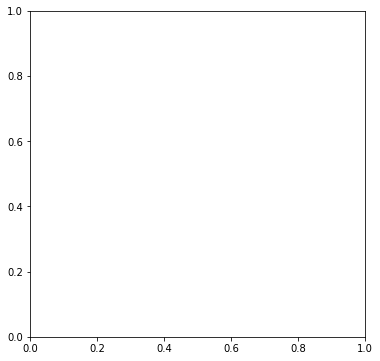

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(G, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [ ]:
sg = next(nx.connected_component_subgraphs(G.to_undirected()))

In [ ]:
pos = {x[0]:(x[1]['lat'], x[1]['lng']) for x in list(G.nodes(data=True))}
pos

In [ ]:
deg = nx.degree(sg)
sizes = [5 * deg[iata] for iata in sg.nodes]

In [ ]:
plt.figure(figsize = (10,9))
m = Basemap(projection='merc',llcrnrlon=-30,llcrnrlat=25,urcrnrlon=50,
urcrnrlat=70, lat_ts=0, resolution='l',suppress_ticks=True)
mx, my = m(cities['lng'].values, cities['lat'].values)
pos = {}
for count, elem in enumerate (cities['name']):
     pos[elem] = (mx[count], my[count])

nx.draw_networkx_nodes(G, pos = pos, node_list =G.nodes() ,node_color = 'firebrick', alpha = 0.8, node_size = [v[1] * 3 for v in G.degree()])
nx.draw_networkx_edges(G, pos = pos, edge_color='cornflowerblue', alpha=0.2, arrows = False)
#nx.draw_networkx_edges(G, pos = pos, edge_color='g', alpha=0.2, arrows = False)
m.drawcountries(linewidth = 3)
#m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
m.bluemarble()
plt.tight_layout()
plt.savefig("map.png", format = "png", dpi = 300)

plt.show()